## 1.2 Exploratory Data Analysis (EDA) & Statistical Thinking

The objective of this step is to build a foundational understanding of the dataset, assess its structure and quality, and uncover patterns in risk and profitability. This step guides model development and business insights by identifying patterns, outliers, and relationships.

### 🔍 Guiding Questions
- What is the overall Loss Ratio (`TotalClaims` / `TotalPremium`) across the portfolio?
- How does Loss Ratio vary by **Province**, **VehicleType**, and **Gender**?
- Are there outliers in `TotalClaims` or `CustomValueEstimate` that may affect analysis?
- Did claim frequency/severity change over time?
- Which vehicle **makes/models** show the highest or lowest claim behavior?

### 🛠️ Key EDA Tasks
- **Data Understanding**: Column names, types, basic structure
- **Data Quality**: Missing values, invalid or unformatted values
- **Univariate Analysis**: Understand distributions
- **Bivariate/Multivariate**: Investigate correlations and group-level differences
- **Time Series Exploration**: Analyze monthly trends
- **Outlier Detection**: Detect numerical extremes
- **Geographical & Demographic Insights**: Explore differences across location/gender/etc.

### 📊 KPIs
- Demonstrates statistical literacy and appropriate use of plots
- Clear visual storytelling of key patterns (e.g., risk concentration, profitability)
- Proactive documentation, thoughtful visualizations, and descriptive commits


In [3]:
import pandas as pd

# Load the dataset using the pipe '|' delimiter
df = pd.read_csv('../data/raw/insurance_data.txt', sep='|')

# Display the first few rows
df.head()


/tmp/ipykernel_8841/105368463.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/insurance_data.txt', sep='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### 1. Load and Prepare the Data

We begin by loading the dataset and ensuring key columns like `TransactionMonth` are in the correct datetime format for later time-based analysis.


In [4]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')


### 2. Data Summary & Initial Checks

Explore the dataset’s dimensions, column types, missing values, and get basic descriptive statistics for numerical variables.


In [5]:
print("\n🔹 Dataset Shape:", df.shape)
print("\n🔹 Column Data Types:\n", df.dtypes)
print("\n🔹 Missing Values:\n", df.isnull().sum()[df.isnull().sum() > 0])
print("\n🔹 Numerical Stats:\n", df[['TotalPremium', 'TotalClaims']].describe())



🔹 Dataset Shape: (1000098, 52)

🔹 Column Data Types:
 UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object

In [19]:
df[['TotalPremium', 'TotalClaims']].describe()


,TotalPremium,TotalClaims
count,618464.000000,618464.000000
mean,100.105362,100.366506
std,286.235339,2989.285329
min,-782.576754,-12002.412281
25%,2.630161,0.000000
50%,7.274123,0.000000
75%,78.947368,0.000000
max,65282.603421,393092.105263


### 3. Calculate Portfolio-Level Loss Ratio

We calculate the loss ratio at the portfolio level, which is defined as `TotalClaims / TotalPremium`. This gives us a sense of overall profitability.


In [18]:
# Drop rows with invalid premiums
df = df[df['TotalPremium'].notnull() & (df['TotalPremium'] != 0)]

# Optional: drop rows with missing claims too
df = df[df['TotalClaims'].notnull()]

# Compute Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Output mean
print("🔹 Overall Portfolio Loss Ratio:", df['LossRatio'].mean())


🔹 Overall Portfolio Loss Ratio: 0.3498846581363078


### 4. Grouped Loss Ratios

We examine how the average loss ratio differs across key dimensions such as Province, VehicleType, and Gender. This can help identify high-risk segments.


In [7]:
for col in ['Province', 'VehicleType', 'Gender']:
    if col in df.columns:
        print(f"\n🔹 Average Loss Ratio by {col}:")
        print(df.groupby(col)['LossRatio'].mean().sort_values(ascending=False))



🔹 Average Loss Ratio by Province:
Province
Northern Cape    0.203831
Eastern Cape          NaN
Free State            NaN
Gauteng               NaN
KwaZulu-Natal         NaN
Limpopo               NaN
Mpumalanga            NaN
North West            NaN
Western Cape          NaN
Name: LossRatio, dtype: float64

🔹 Average Loss Ratio by VehicleType:
VehicleType
Light Commercial     0.543917
Bus                       NaN
Heavy Commercial          NaN
Medium Commercial         NaN
Passenger Vehicle         NaN
Name: LossRatio, dtype: float64

🔹 Average Loss Ratio by Gender:
Gender
Female          NaN
Male            NaN
Not specified   NaN
Name: LossRatio, dtype: float64


### 5. Univariate Distribution Analysis

Visualize the distribution of important numeric variables such as `TotalPremium` and `TotalClaims` to detect skewness, outliers, or irregular patterns.


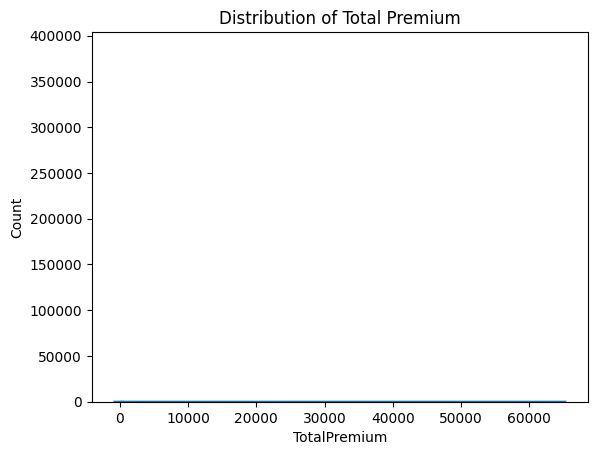

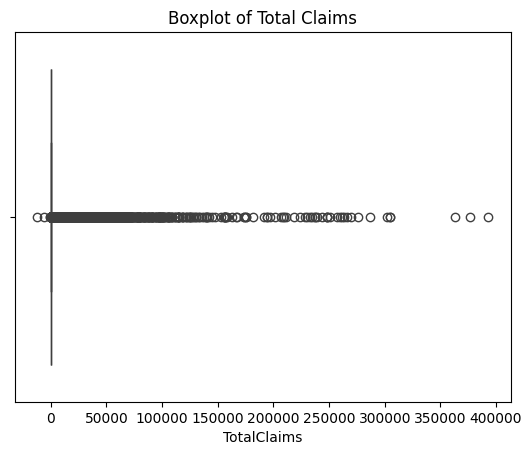

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['TotalPremium'], kde=True)
plt.title("Distribution of Total Premium")
plt.show()

sns.boxplot(x=df['TotalClaims'])
plt.title("Boxplot of Total Claims")
plt.show()


### 6. Correlation & Scatter Plots

Check correlation between key variables (e.g., TotalPremium and TotalClaims) and use scatter plots to explore their relationships.


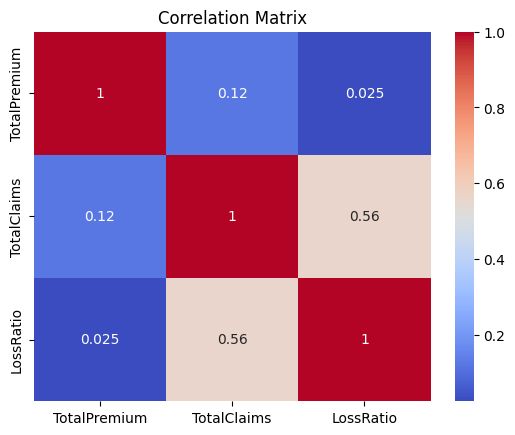

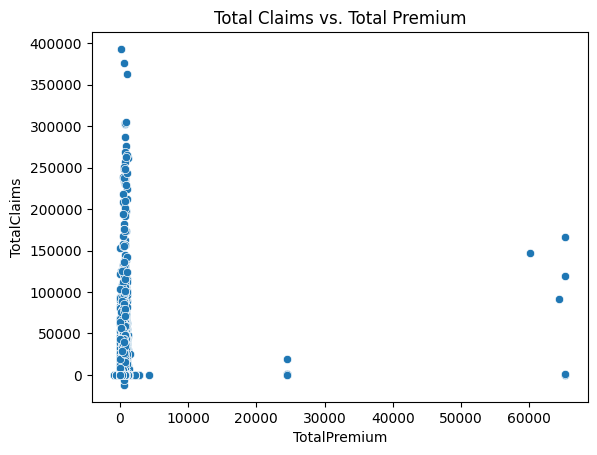

In [9]:
corr_cols = ['TotalPremium', 'TotalClaims', 'LossRatio']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
plt.title("Total Claims vs. Total Premium")
plt.show()


### 7. Monthly Trends Over Time

Analyze monthly trends in TotalClaims, TotalPremium, and LossRatio to see if there's seasonality, spikes, or trends over the 18-month period.


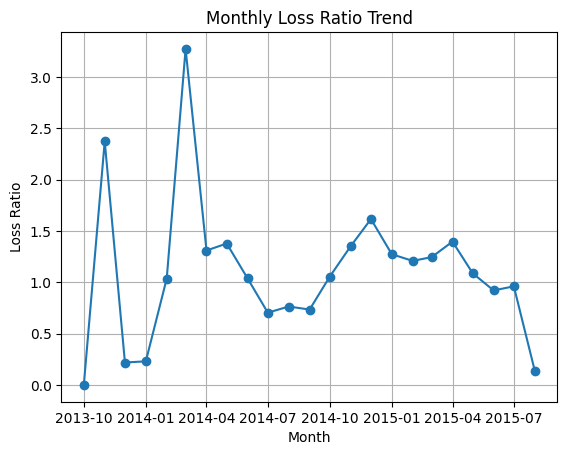

In [10]:
monthly_stats = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
}).reset_index()

monthly_stats['LossRatio'] = monthly_stats['TotalClaims'] / monthly_stats['TotalPremium']
monthly_stats['TransactionMonth'] = monthly_stats['TransactionMonth'].dt.to_timestamp()

plt.plot(monthly_stats['TransactionMonth'], monthly_stats['LossRatio'], marker='o')
plt.title("Monthly Loss Ratio Trend")
plt.xlabel("Month")
plt.ylabel("Loss Ratio")
plt.grid(True)
plt.show()


In [16]:
print(df.columns.tolist())


['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'LossRatio']


### 8. Risk by Vehicle Make/Model

Explore which vehicle makes have the highest and lowest average loss ratios. This helps identify risky or profitable vehicle segments.


In [17]:
# Make sure LossRatio is computed
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Filter to avoid NaN values before grouping
filtered_df = df[df['LossRatio'].notnull() & df['make'].notnull()]

# Now group by 'make' and calculate average LossRatio
if not filtered_df.empty:
    print("\n🔹 Top 10 High-Risk Vehicle Makes (by Avg Loss Ratio):")
    print(filtered_df.groupby('make')['LossRatio'].mean().sort_values(ascending=False).head(10))
else:
    print("No valid data for 'make' and 'LossRatio' to compute.")



🔹 Top 10 High-Risk Vehicle Makes (by Avg Loss Ratio):
make
MITSUBISHI                             16.692727
JMC                                     1.420159
SAIC                                    1.375086
HYUNDAI                                 0.969834
POLARSUN                                0.633500
MERCEDES-BENZ                           0.549773
GOLDEN JOURNEY                          0.493571
FIAT                                    0.444237
B.A.W                                   0.383443
FORD                                    0.316482
Name: LossRatio, dtype: float64


### 9. Detect Outliers Using Boxplots

Visualize outliers in numerical variables like `CustomValueEstimate` to understand the presence of extreme values.


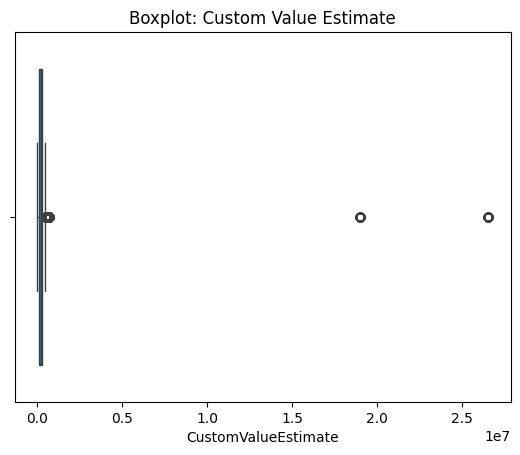

In [11]:
sns.boxplot(x=df['CustomValueEstimate'])
plt.title("Boxplot: Custom Value Estimate")
plt.show()


#  Data Comparison (Geographical Trends)

In [20]:
df.groupby('Province')['TotalPremium'].mean()


Province
Eastern Cape     108.645742
Free State        87.889960
Gauteng           99.889846
KwaZulu-Natal    117.788873
Limpopo           85.364235
Mpumalanga        89.577486
North West        83.414160
Northern Cape     86.894887
Western Cape     101.333594
Name: TotalPremium, dtype: float64

## 📊 10. Summary of Key Findings

### 🧼 Data Quality
- Several columns contain a high percentage of missing values, including:
  - `NumberOfVehiclesInFleet`
  - `CrossBorder`
  - `CustomValueEstimate`
- No duplicate **rows**, but many duplicate **PolicyIDs**, suggesting multiple transactions per policy.
- `TransactionMonth` is consistently formatted as a date.
- Certain categorical variables (e.g., `Gender`) contain a significant number of "Not specified" entries.

---

### 🌍 Geographic Patterns
- **Gauteng** and **KwaZulu-Natal** show the highest:
  - Average **premiums**
  - Average **claims**
  - Number of **policies**
- **Gauteng** has the highest **Loss Ratio**, suggesting increased risk or higher claim amounts.
- **Northern Cape** shows the lowest:
  - Premiums
  - Claims
  - Loss ratio
- Overall, there are strong **regional differences** in both **risk** and **business volume**.

---

### 🚗 Vehicle Insights
- **Buses** carry the highest **average premiums**.
- **Heavy Commercial vehicles** have the highest **average claim amounts**.
- **Passenger Vehicles** are the most common, but **commercial types** (e.g., trucks, buses) pose **higher risk**.
- **Claim amounts** tend to **decrease with vehicle age**.
- A high concentration of claims comes from vehicles with **engine sizes near 2000cc**.
- **Toyota** is the most represented **vehicle make** in the portfolio.
